In [1]:
from urllib.request import urlopen, Request
from user_agent import generate_user_agent
from bs4 import BeautifulSoup
import os
import pandas as pd 
import requests
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

/Users/shaimay/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [17]:
url = "https://finviz.com/quote.ashx?t="

news_tables = {}
tickers = ['AMZN']

In [23]:
for ticker in tickers: 
    news_tables[ticker] = []
    ticker_url = url + ticker
    req = Request(url = ticker_url, headers={'user-agent': 'my-app/0.0.1'})
    response = urlopen(req)

    soup = BeautifulSoup(response)
    news_title_html = soup.select('#news-table .news-link-left')
    
    for i in range(len(news_title_html)):
        news_tables[ticker].append(news_title_html[i].text)

In [34]:
vader = SentimentIntensityAnalyzer()
columns = ['headline']

parsed_and_scored_news = pd.DataFrame(news_tables['AMZN'], columns=columns)
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)

In [36]:
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
parsed_and_scored_news.head()

,headline,neg,neu,pos,compound
0,2 Strong Buy FAANG Stocks to Watch Into Earnings,0.000,0.680,0.320,0.5106
1,G20 finance officials vow to resolve digital t...,0.000,0.794,0.206,0.3818
2,Amazon Has a New Partner in Its Health Care As...,0.259,0.408,0.333,0.0258
3,Will Amazon Prime Reach 200 Million Members by...,0.000,0.781,0.219,0.2023
4,The Biggest Problem With Investing in Teladoc,0.310,0.690,0.000,-0.4019


In [37]:
parsed_and_scored_news['compound'].mean()

0.033239

In [42]:
url = "https://finviz.com/quote.ashx?t="

def scrape(ticker):
    ticker_url = url + ticker
    req = Request(url=ticker_url, headers={'user-agent':generate_user_agent()})
    response = urlopen(req)

    soup = BeautifulSoup(response)
    return soup

def scrape_news(ticker):
    html = scrape(ticker)
    news_title_html = html.select("#news-table .news-link-left")
    news = []
    for i in range(len(news_title_html)):
        news.append(news_title_html[i].text)

    return news

In [45]:
vader = SentimentIntensityAnalyzer()

def get_sentiment(ticker):
    columns = ['headline']
    news = scrape_news(ticker)
    news = pd.DataFrame(news, columns=columns)
    scores = news['headline'].apply(vader.polarity_scores).tolist()
    scores_df = pd.DataFrame(scores)
    news = news.join(scores_df, rsuffix='_right')

    return news['compound'].mean()

In [46]:
get_sentiment('AMZN')

0.033239

In [53]:
from yahoo_finance import Share

In [8]:
from iexfinance.stocks import Stock

In [5]:
tlsa = Stock("AMZN", token="Tsk_9e2d59a28adb408bb43d8f460553c556").get_quote()

IEXQueryError: An error occurred while making the query.

In [ ]:
tlsa

In [6]:
from datetime import datetime, timedelta
from iexfinance.stocks import Stock, get_historical_data

In [105]:
oneyear = datetime.now().date() - timedelta(days=365)
oneyear

datetime.date(2019, 7, 20)

In [7]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [243]:
data = get_historical_data(ticker, start=oneyear, end=datetime.now().date(), output_format='pandas', token = "Tpk_68eb4634611c4b09a0415877f28eaeda")

In [244]:
data

,open,high,low,close,volume
date,,,,,
2019-07-22,2067.70,2004.00,2040.71,1992.91,2970079
2019-07-23,1997.98,2066.20,2035.82,1996.38,2810747
2019-07-24,2028.40,2034.30,2046.08,2027.15,2642959
2019-07-25,2064.00,2039.20,1998.43,1993.63,4305242
2019-07-26,2002.00,1976.86,1961.76,1973.29,5091544
...,...,...,...,...,...
2020-07-13,3361.33,3458.75,3112.19,3250.00,7839221
2020-07-14,3115.00,3224.70,3002.00,3183.00,7272891
2020-07-15,3177.34,3223.34,3026.28,3026.30,5882882


In [137]:
fig = Figure()
axis = fig.add_subplot(1, 1, 1)
axis.set_title(ticker + "1-year prices")
axis.set_xlabel("Date")
axis.set_ylabel("Closing price ($)")
axis.plot(data['close'])
pngImage = io.BytesIO()

pngImageB64String = "data:image/png;base64,"
pngImageB64String += base64.b64encode(pngImage.getvalue()).decode('utf8')

pngImageB64String

'data:image/png;base64,'

In [141]:
import base64
import io
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price (in USD)')

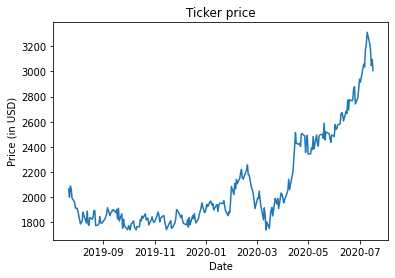

In [148]:
plt.plot(data['close'])
plt.title("Ticker price")
plt.xlabel("Date")
plt.ylabel("Price (in USD)")

In [150]:
pngImage = io.BytesIO()
FigureCanvas(fig).print_png(pngImage)

In [153]:
from iexfinance.stocks import get_historical_intraday
token = "Tpk_68eb4634611c4b09a0415877f28eaeda"

In [315]:
data = get_historical_intraday("TLSA", token=token)
import time
import re

In [327]:
data

[{'date': '2020-07-17',
  'minute': '09:30',
  'label': '09:30 AM',
  'high': 10.76,
  'low': 10.82,
  'open': 10.74,
  'close': 10.51,
  'average': 10.94,
  'volume': 201,
  'notional': 2146,
  'numberOfTrades': 2},
 {'date': '2020-07-17',
  'minute': '09:31',
  'label': '09:31 AM',
  'high': 11.04,
  'low': 11.18,
  'open': 11.18,
  'close': 11.07,
  'average': 11.39,
  'volume': 100,
  'notional': 1122,
  'numberOfTrades': 1},
 {'date': '2020-07-17',
  'minute': '09:32',
  'label': '09:32 AM',
  'high': None,
  'low': None,
  'open': None,
  'close': None,
  'average': None,
  'volume': 0,
  'notional': 0,
  'numberOfTrades': 0},
 {'date': '2020-07-17',
  'minute': '09:33',
  'label': '09:33 AM',
  'high': None,
  'low': None,
  'open': None,
  'close': None,
  'average': None,
  'volume': 0,
  'notional': 0,
  'numberOfTrades': 0},
 {'date': '2020-07-17',
  'minute': '09:34',
  'label': '09:34 AM',
  'high': None,
  'low': None,
  'open': None,
  'close': None,
  'average': None,
 

In [316]:
time = []
value = []
for i in range(len(data)):
    time.append(data[i]["label"])
    value.append(data[i]["close"])

In [317]:
results = []
for i in range(len(time)): 
    pattern = '^\d+\s\w\w'
    #pattern1 = '^\d+'
    #pattern2 = '\s\w\w'
    result = re.match(pattern, time[i])
    if result:
        result = result.group(0)
        if len(result) == 4:
            hour = result[0]
            ampm = result[2:]
        else:
            hour = result[0:2]
            ampm = result[3:]
        
        real=hour+':00 '+ampm
        time[i] = real

In [318]:
data_frame = pd.DataFrame({"Time":time, "Value":value})

In [319]:
data_frame["Time"] = pd.to_datetime(data_frame["Time"], format='%I:%M %p').dt.time


In [323]:
data_frame['Time'] = data_frame['Time'].astype(str)
data_frame.set_index('Time', inplace=True)

In [326]:
data_frame.head()

,Value
Time,
09:30:00,10.51
09:31:00,11.07
09:32:00,NaN
09:33:00,NaN
09:34:00,NaN


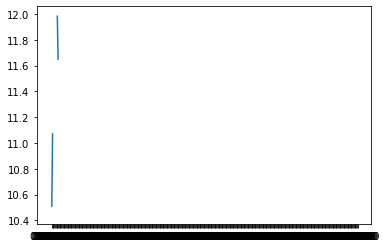

In [325]:
plt.plot(data_frame["Value"])

In [296]:
fig = Figure()
axis1 = fig.add_subplot(1, 1, 1)
axis1.set_title(ticker + " Today data")
axis1.set_xlabel("Time")
axis1.set_ylabel("Price")
axis1.grid()

axis1.plot(data_frame["Time"], data_frame["Value"])
for i, t in enumerate(axis1.get_xticklabels()):
    if (i % 30) != 0:
        t.set_visible(False)

In [13]:
batch = Stock(['TLSA', 'AAPL'], token = token)

In [12]:
token= "Tpk_68eb4634611c4b09a0415877f28eaeda"

In [15]:
batch.get_price()

IEXQueryError: An error occurred while making the query.